## Feature Selection

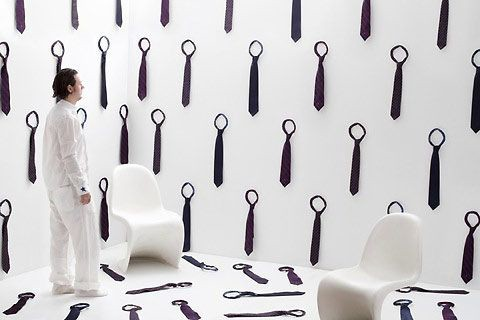

We all may have faced this problem of identifying the related features from a set of data and removing the irrelevant or less important features with do not contribute much to our target variable in order to achieve better accuracy for our model.

**Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model**. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.

**Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in****

Feature Selection Methods:

I will share 3 Feature selection techniques that are easy to use and also gives good results.
1. Univariate Selection
2. Feature Importance 
3. Correlation Matrix with Heatmap

### **1. Univariate Selection**

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range


In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2 , k=10)
fit = bestfeatures.fit(X, y )

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
# concatenate two dataframes for better visualizaton
featureScores = pd.concat([dfcolumns , dfscores] ,axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [ ]:
featureScores

In [ ]:
featureScores.nlargest(10 , 'Score')

### 2. Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

In [ ]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### **3.Correlation Matrix with Heatmap**
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Have a look at the last row i.e price range, see how the price range is correlated with other features, ram is the highly correlated with price range followed by battery power, pixel height and width while m_dep, clock_speed and n_cores seems to be least correlated with price_range.


We have discovered how to select relevant features from data using Univariate Selection technique, feature importance and correlation matrix.

If you found this kernel useful please upvote and share it with others. Thank you. 

Refrence :  https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e